# Heart Disease Analysis and Prediction Using Machine Learning

## Problem
Heart disease is a leading cause of mortality and morbidity worldwide, making its timely detection and accurate prediction crucial for effective management and prevention. However, the diagnosis of heart disease can be challenging due to its complex nature and the presence of various risk factors. Traditional diagnostic methods may lack the precision and efficiency needed for early detection and prediction. Therefore, there is a pressing need to develop advanced machine learning models that can analyze patient data and accurately predict the likelihood of heart disease, enabling proactive healthcare interventions.

## Objective 
The objective of this study is to utilize machine learning techniques for the analysis and prediction of heart disease. 

__Data Source:__
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv("../data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(303, 14)

In [4]:
# dtypes 
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data[['sex','target']] = data[['sex','target']].astype(object)

In [7]:
# check missing data 
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Descriptive statistics

In [8]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,3,145,233,1,0,150,0,2.3,0,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2
2,41,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
# summary statistics of numerical variables 
rp.summarize(num_cols[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal']])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,age,303,54.3663,55.0,82.4846,9.0821,0.5218,age
1,cp,303,0.967,1.0,1.0651,1.0321,0.0593,cp
2,trestbps,303,131.6238,130.0,307.5865,17.5381,1.0075,trestbps
3,chol,303,246.264,240.0,2686.4267,51.8308,2.9776,chol
4,fbs,303,0.1485,0.0,0.1269,0.3562,0.0205,fbs
5,restecg,303,0.5281,1.0,0.2765,0.5259,0.0302,restecg
6,thalach,303,149.6469,153.0,524.6464,22.9052,1.3159,thalach
7,exang,303,0.3267,0.0,0.2207,0.4698,0.027,exang
8,oldpeak,303,1.0396,0.8,1.3481,1.1611,0.0667,oldpeak
9,slope,303,1.3993,1.0,0.3797,0.6162,0.0354,slope


In [10]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,sex,target
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1


In [11]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['sex', 'target']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,sex,1,207,68.32
1,,0,96,31.68
2,target,1,165,54.46
3,,0,138,45.54


## Correlations between Variables 

In [12]:
# correlation: Pearson’s by default 
num_cols.corr(method='pearson')

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764


## Skewness 

In [13]:
# skew 
num_cols.skew() 

age        -0.202463
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
dtype: float64

## Data visualizations

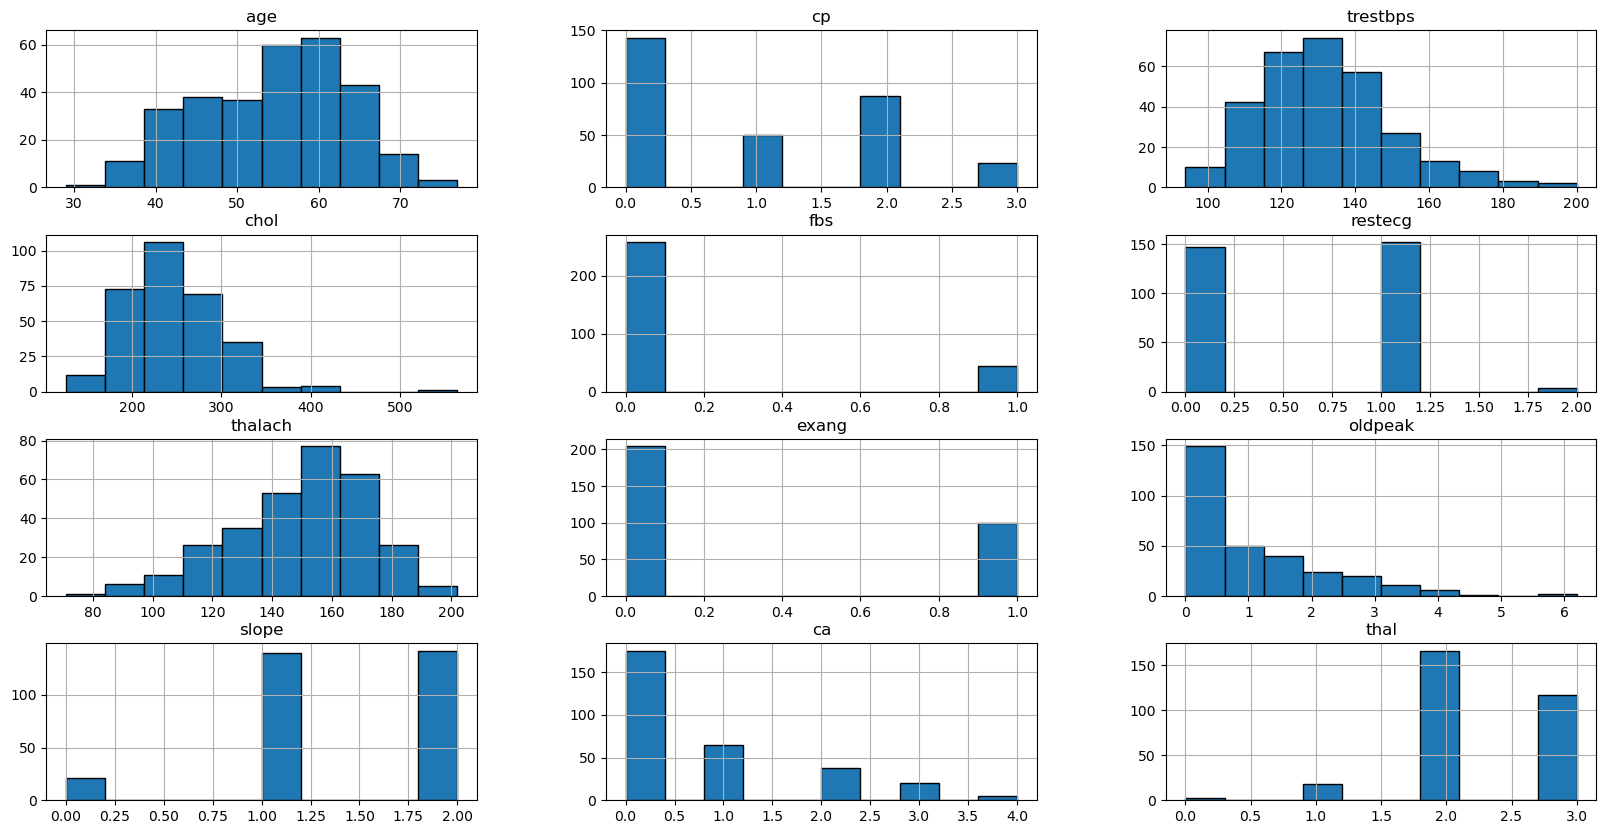

In [14]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

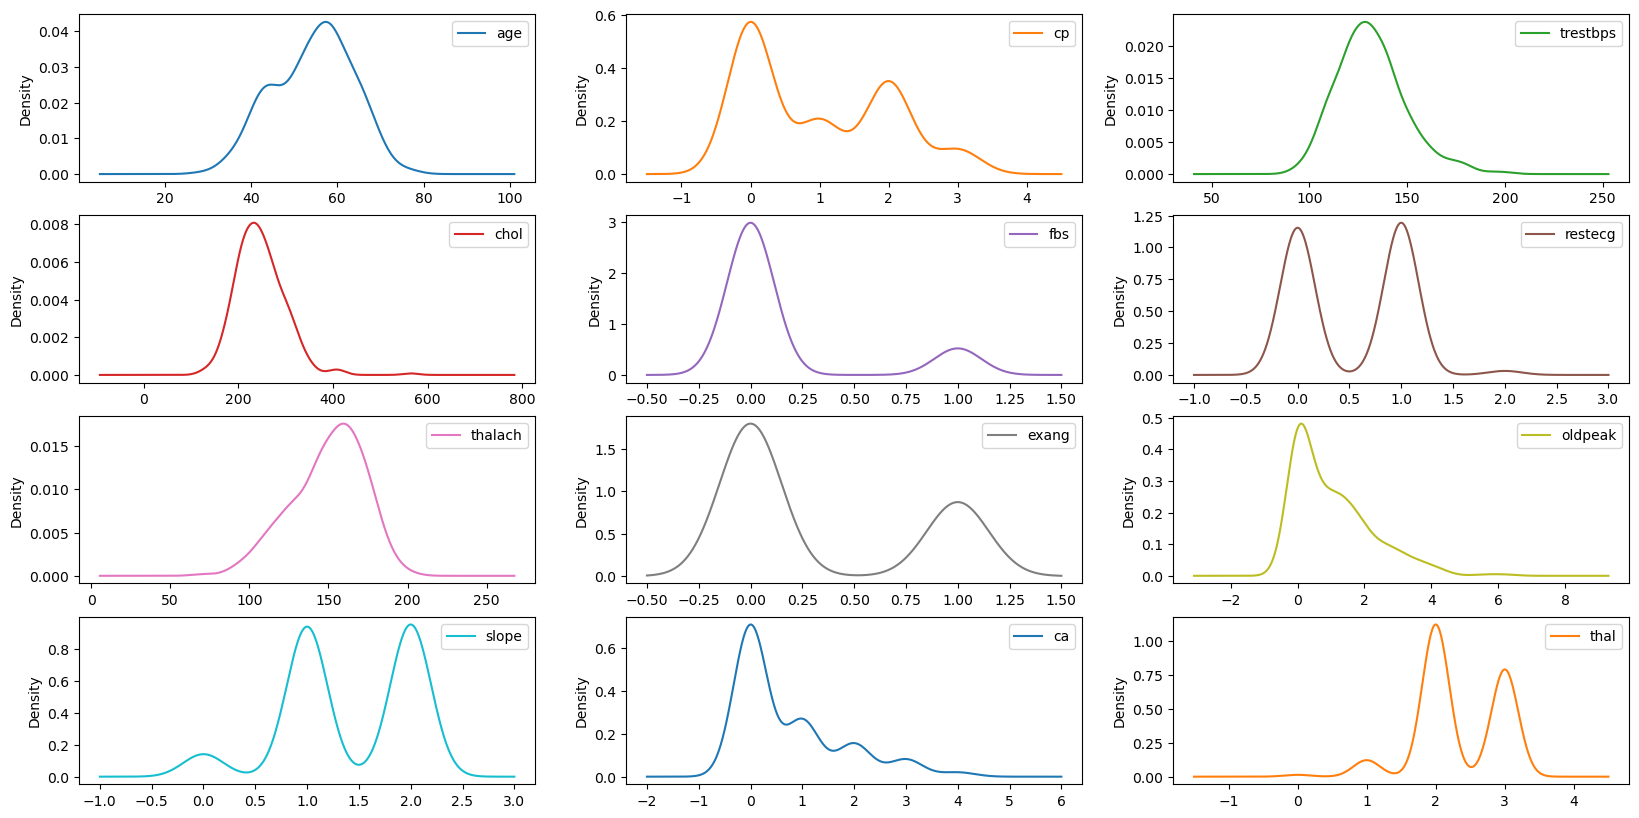

In [15]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show() 

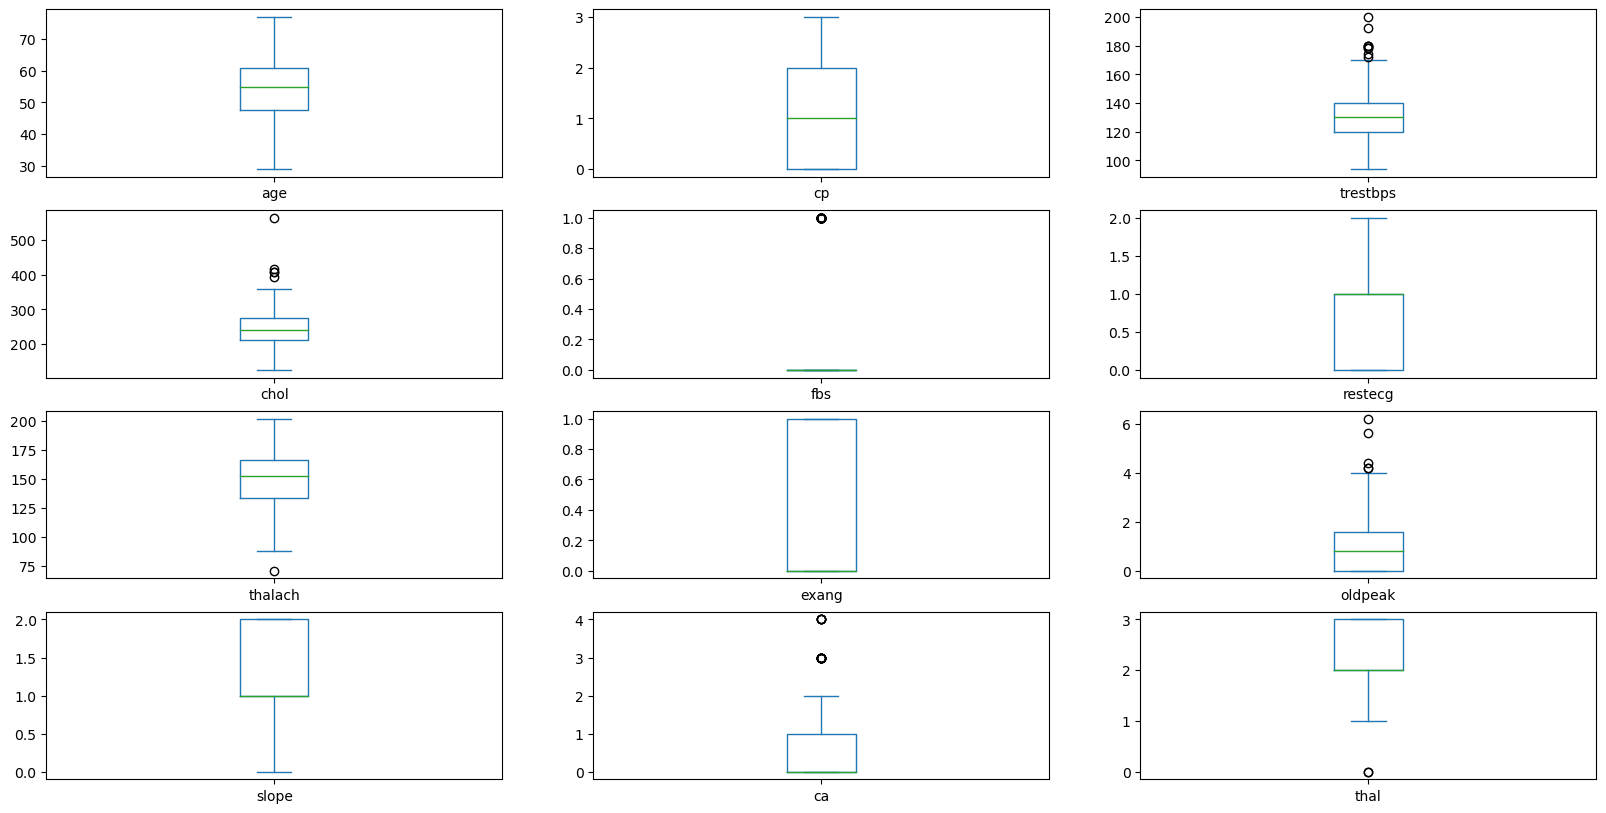

In [16]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show() 

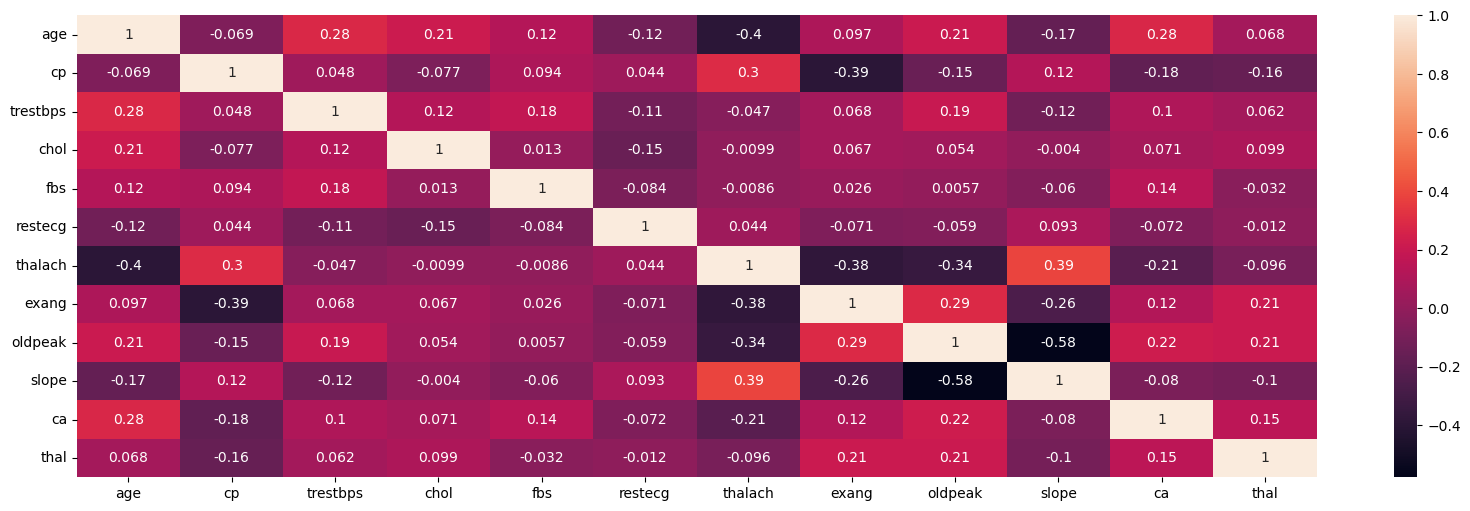

In [17]:
# Multivariate plots with correlations 
plt.figure(figsize=(20,6))
corr = num_cols.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [18]:
# exmine first few rows of data 
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Ordinal features,1
8,Numeric features,12
9,Categorical features,1


## Compare Models 

In [20]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.3820
ridge,Ridge Classifier,0.8201,0.0000,0.8841,0.8069,0.8359,0.6346,0.6558,0.3800
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.4040
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.3860
lr,Logistic Regression,0.8154,0.9189,0.8750,0.8061,0.8310,0.6245,0.6463,0.8670
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.4090
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.3820
gbc,Gradient Boosting Classifier,0.7972,0.8802,0.8152,0.8122,0.8084,0.5900,0.5992,0.3940
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.4850
dt,Decision Tree Classifier,0.7545,0.7546,0.7659,0.7890,0.7680,0.5068,0.5231,0.3830


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [21]:
# create model 
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
# print model parameters
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


## Tune Model 

In [23]:
# tune hyperparameters of rf
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
# to access the tuner object you can set return_tuner = True
tuned_nb, tuner = tune_model(nb, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal...
                                      verbose=False),
                   n_iter=10, n_jobs=-1,
                   param_distributions={'actual_estimator__var_smoothing': [1e-09,
                                                                            2e-09,
                                                                            5e-09,
                                                                            8e-09,
                                                                            9e-09,
                                                                            1e-07,
                                                                            2e-07,
                                                                            3e-07,
                                                                            5e-07,
                                                                            7e-07,
                                                                            9e-07,
                                                                            1e-05,
                                                                            0.001,
                                                                            0.002,
                                                                            0.003,
                                                                            0.004,
                                                                            0.005,
                                                                            0.007,
                                                                            0.009,
                                                                            0.004,
                                                                            0.005,
                                                                            0.006,
                                                                            0.007,
                                                                            0.008,
                                                                            0.009,
                                                                            0.01,
                                                                            0.1,
                                                                            1]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Analyze Model 

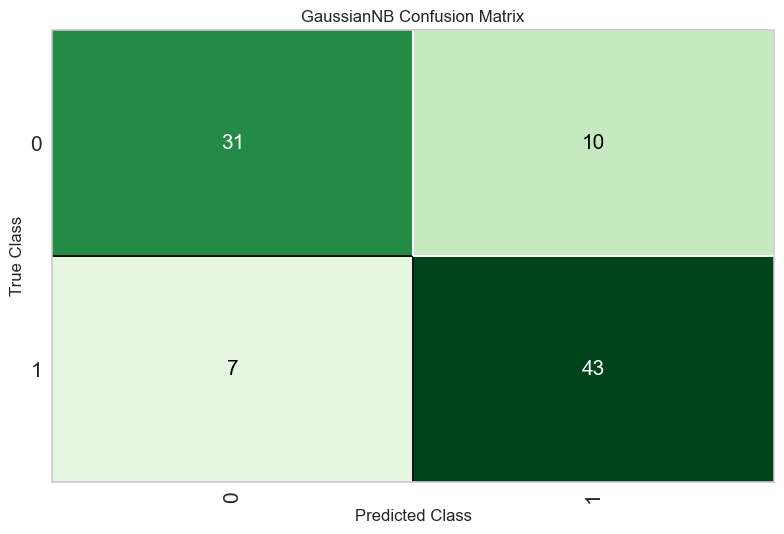

In [27]:
# plot confusion matrix
plot_model(nb, plot = 'confusion_matrix')

In [29]:
# plot AUC
plot_model(nb, plot = 'auc')

TypeError: unsupported operand type(s) for -: 'int' and 'Categorical'

<Figure size 800x550 with 0 Axes>

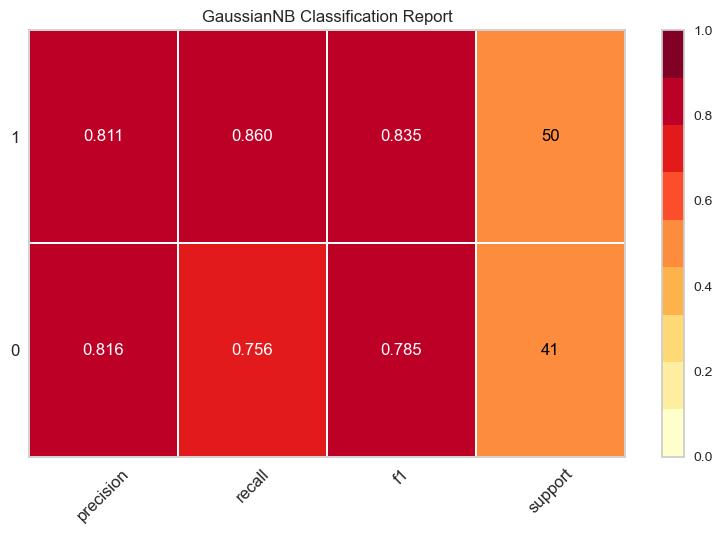

In [30]:
# plot class report
plot_model(nb, plot = 'class_report')

In [31]:
# plot feature importance
plot_model(nb, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

## Evaluate Model 

In [32]:
# evaluate model 
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [33]:
# finalize a model
finalize_model(nb)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'cp', 'trestbps', 'chol',
                                             'fbs', 'restecg', 'thalach',
                                             'exang', 'oldpeak', 'slope', 'ca',
                                             'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_...
                 TransformerWrapper(exclude=None, include=['sex'],
                                    transformer=OrdinalEncoder(cols=['sex'],
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               mapping=[{'col': 'sex',
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.0    0
1.0    1
NaN   -1
dtype: int64}],
                                                               return_df=True,
                                                               verbose=0))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

## Prediction

In [34]:
# predict on test set
holdout_pred = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8132,0.8741,0.8600,0.8113,0.8350,0.6202,0.6216


In [35]:
# show predictions df
holdout_pred.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0,1.0000
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,1,0.6576
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,1,0.9235
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1,1,0.9485
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0.7094


In [36]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
# predict model on new_data
predictions = predict_model(nb, data = new_data)
predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction_label,prediction_score
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,0.8095
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0,0.9799
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.9980
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.9932
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.9513


## Save Model 

In [38]:
# save pipeline
save_model(nb, '../models/heart_diseases')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'cp', 'trestbps', 'chol',
                                              'fbs', 'restecg', 'thalach',
                                              'exang', 'oldpeak', 'slope', 'ca',
                                              'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_...
                  TransformerWrapper(exclude=None, include=['sex'],
                                     transformer=OrdinalEncoder(co

In [39]:
# load pipeline
loaded_best_pipeline = load_model('../models/heart_diseases')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'cp', 'trestbps', 'chol',
                                             'fbs', 'restecg', 'thalach',
                                             'exang', 'oldpeak', 'slope', 'ca',
                                             'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_...
                 TransformerWrapper(exclude=None, include=['sex'],
                                    transformer=OrdinalEncoder(cols=['sex'],
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               mapping=[{'col': 'sex',
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.0    0
1.0    1
NaN   -1
dtype: int64}],
                                                               return_df=True,
                                                               verbose=0))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)